In [2]:
import pandas as pd

In [3]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv') #TODO

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [5]:
#TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [6]:
df['EDUCATION'].mean()

1.8531333333333333

In [7]:
df['BILL_AMT1'].median()

22381.5

In [9]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
df[(df['SEX'] == 2) & (df['EDUCATION'] == 2)]['ID'].count()

8656

In [16]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
col_filter = [col for col in df if col.startswith('BILL_') or col.startswith('PAY_')]
df.groupby('default.payment.next.month')[col_filter].median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [12]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table('ID', 'MARRIAGE', ['SEX', 'EDUCATION'], 'count') #TODO

SEX          1                                              2                  \
EDUCATION    0       1       2       3     4     5     6    0       1       2   
MARRIAGE                                                                        
0          NaN     1.0     1.0    12.0   NaN   NaN   NaN  NaN     3.0     5.0   
1          2.0  1690.0  2370.0  1048.0  18.0  48.0  14.0  2.0  2032.0  4472.0   
2          6.0  2633.0  2940.0   894.0  23.0  46.0  11.0  4.0  4176.0  4080.0   
3          NaN    30.0    63.0    36.0   1.0   1.0   NaN  NaN    20.0    99.0   

SEX                                   
EDUCATION       3     4      5     6  
MARRIAGE                              
0            32.0   NaN    NaN   NaN  
1          1813.0  34.0  102.0  14.0  
2          1015.0  45.0   81.0  10.0  
3            67.0   2.0    2.0   2.0

In [18]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
df['LIMIT_BAL_CATEGORY'] = df['LIMIT_BAL'].map(lambda x: 'A' if x <= 10000 else ('B' if x <= 100000 else ('C' if x <= 200000 else ('D' if x <= 400000 else ('E' if x <= 700000 else 'F')))))

In [19]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,LIMIT_BAL_CATEGORY
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B
5,6,50000.0,1,1,2,37,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,B
6,7,500000.0,1,1,2,29,0,0,0,0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,E
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,B
8,9,140000.0,2,3,1,28,0,0,2,0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,C
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,B


In [21]:
%matplotlib inline

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79b82a9828>]],
      dtype=object)

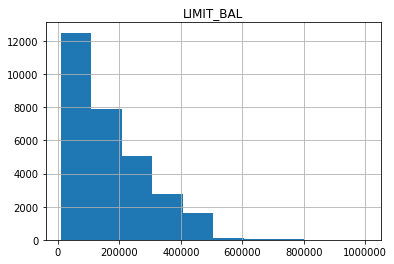

In [24]:
df.hist(column='LIMIT_BAL') #TODO

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

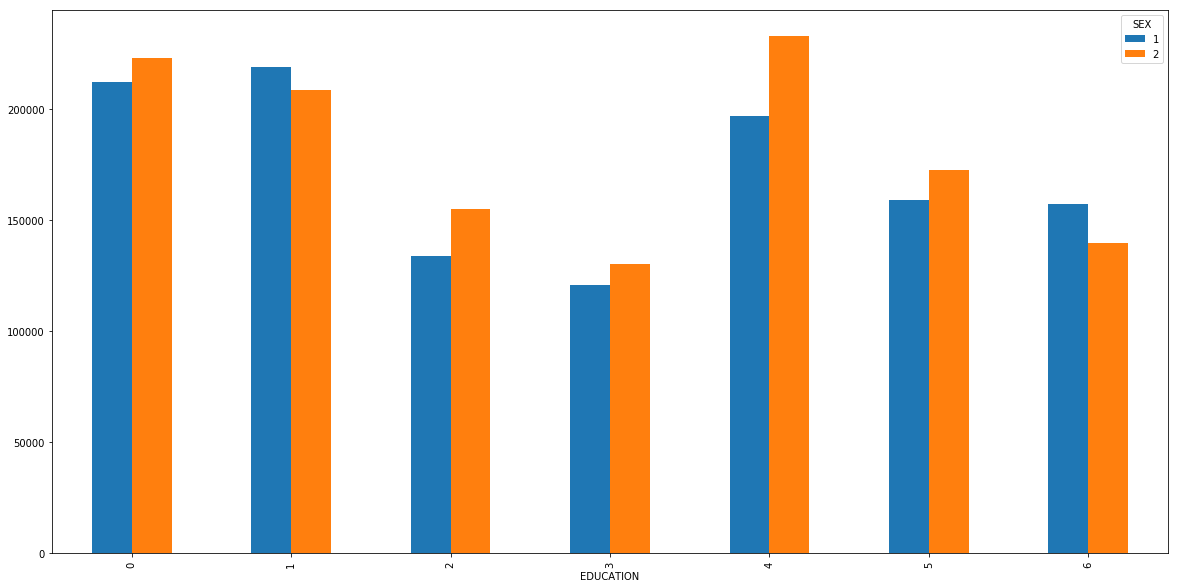

In [26]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
fig, ax = plt.subplots(figsize=(20,10))
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'mean').plot(kind='bar', ax=ax)

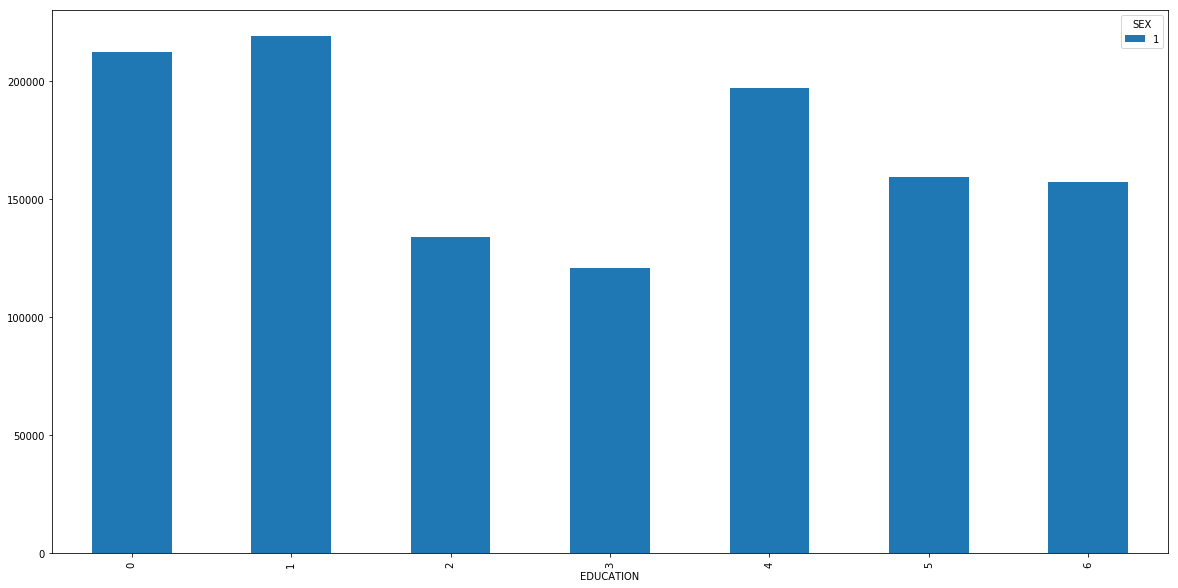

In [28]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

fig, ax = plt.subplots(figsize=(20,10))
df[df['SEX'] == 1].pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'mean').plot(kind='bar', ax=ax)

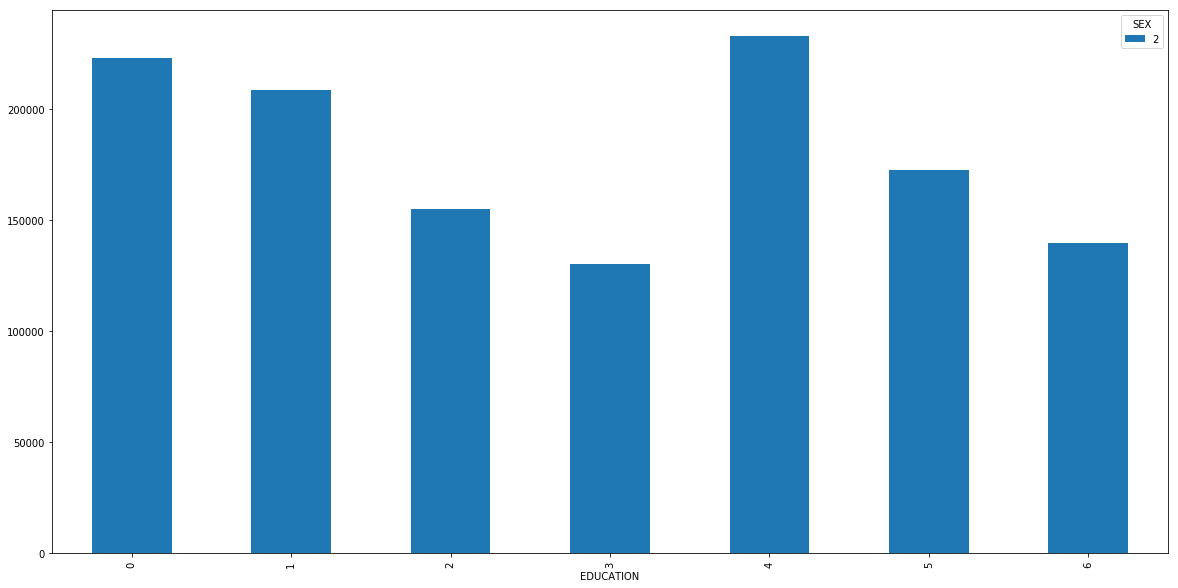

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
df[df['SEX'] == 2].pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'mean').plot(kind='bar', ax=ax)

In [4]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO